# **Naive Bayes with Python Scikit Learn**


----

Now we will see how Python Scikit-Learn library for machine learning can be used to implement Naive Bayes Classifier.


# **Naive Bayes Classifier**


---
Naive Bayes Classifier is a supervised learning algorithm used for classification based on Bayes' Theorem. It is not just an algorithm, but a collection of many algorithms that work on the same concept, the Bayes' Theorem.

# **Type of Naive Bayes Classifier**

---


We have three type of naive bayes classifier:  

*   Gaussian
*   Multinomial
*   Bernoulli

**Note:** We will be implementing Gaussian Naive Bayes in the below code


# **Bayes Theorem**
---

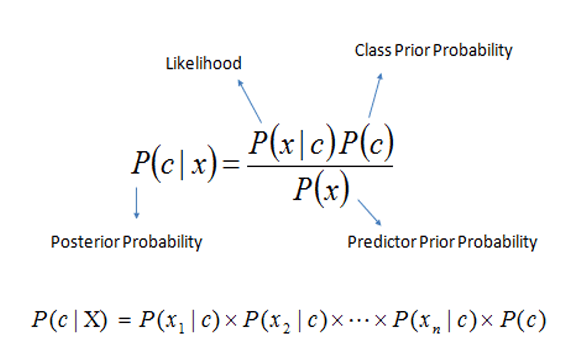

Where,

* P(c|x) is the posterior probability of class c given predictor ( features).
* P(c) is the probability of class.
* P(x|c) is the likelihood which is the probability of predictor given class.
* P(x) is the prior probability of predictor.

Using Bayes theorem, we can find the probability of C happening, given that X has occurred. Here, X is the evidence and C is the hypothesis. The assumption made here is that the predictors/features are independent ,i.e., presence of one particular feature does not affect the other. Hence it is called naive.


# **Step 1: Importing Libraries**

In [ ]:
# import dependencies
import numpy as np
import pandas as pd

# other dependencies that you might not need
# just for publishing image in notebook
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib  inline

# **Step 2: Reading Data**

In [ ]:
# column has all the name of column name 
# our data is stored in dataframe: data

column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
data = pd.read_csv('/content/pima-indians-diabetes.csv',names=column)

# This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Step 3: Data Preprocessing**

In [ ]:
X = data.iloc[:,0:-1] # X is the features in our dataset
y = data.iloc[:,-1]   # y is the Labels in our dataset

# **Step 4: Building Model**

In [ ]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [ ]:
# now preparing our model as per Gaussian Naive Bayesian

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train) #fitting our model

# **Step 5: Making Prediction**

In [ ]:
predicted_y = model.predict(X_test) #now predicting our model to our test dataset
print (predicted_y)

[0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]


# **Step 6: Calculating Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, predicted_y) 
prediction = accuracy_score * 100
print ("Final Prediction Score: ",prediction)

Final Prediction Score:  73.62204724409449


# **Step 7: Plotting results**

Text(0, 0.5, 'Year')

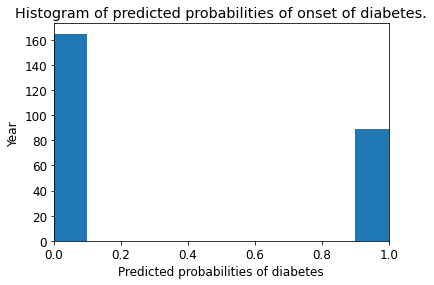

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(predicted_y, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of onset of diabetes.')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of diabetes')
plt.ylabel('Year')


# **Step 8: Visualize confusion matrix with seaborn heatmap**

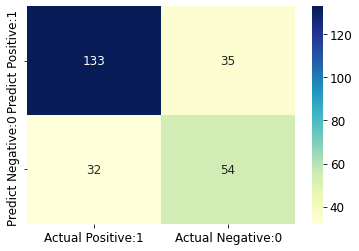

In [ ]:
import seaborn as sns # for statistical data visualization
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, predicted_y)
ac = accuracy_score(y_test,predicted_y)

cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
